## STOCK PREDICTER AND ANALYSER* (eg: Reliance.NS) 

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [ ]:
from google.colab import files
files.upload()

In [57]:
dataset = pd.read_csv("RELIANCE.NS Training.csv",index_col="Date", parse_dates=True)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-10-16,50.137901,52.230900,47.677799,48.466599,21.980963,31111262.0
2000-10-17,47.662201,48.685299,46.428299,47.162399,21.389473,37607074.0
2000-10-18,46.779701,47.248299,45.959702,46.600101,21.134457,17358208.0
2000-10-19,46.358002,48.169899,44.827301,47.349800,21.474464,32123844.0
2000-10-20,48.302601,48.966400,46.256500,46.561100,21.116770,40302077.0


In [58]:
dataset.isna().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4958 entries, 2000-10-16 to 2020-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4899 non-null   float64
 1   High       4899 non-null   float64
 2   Low        4899 non-null   float64
 3   Close      4899 non-null   float64
 4   Adj Close  4899 non-null   float64
 5   Volume     4899 non-null   float64
dtypes: float64(6)
memory usage: 271.1 KB


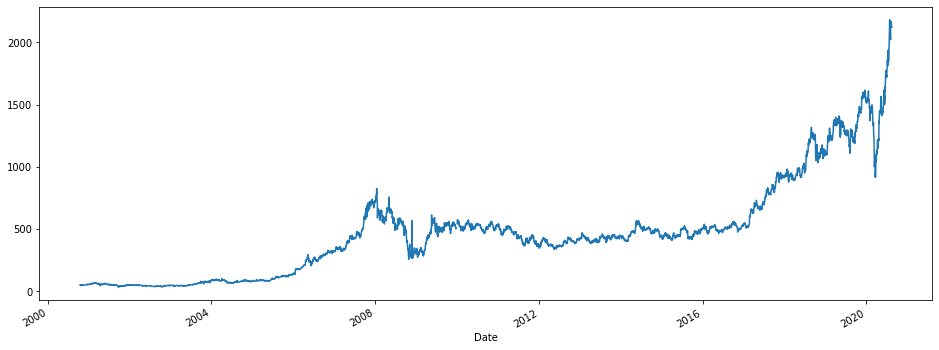

In [60]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
dataset.rolling(7).mean().head(20)

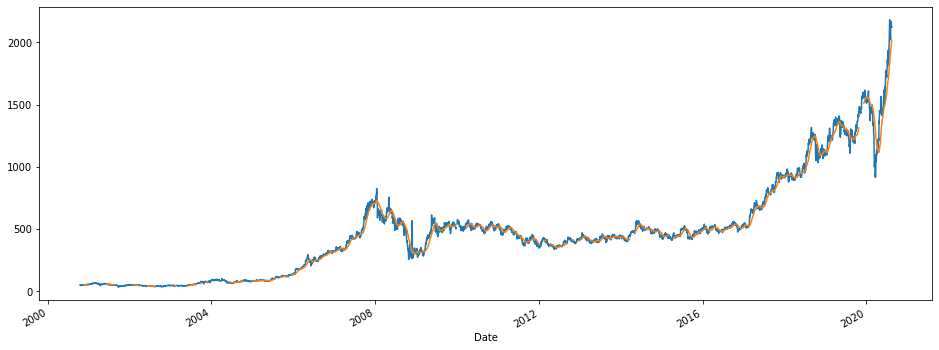

In [62]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

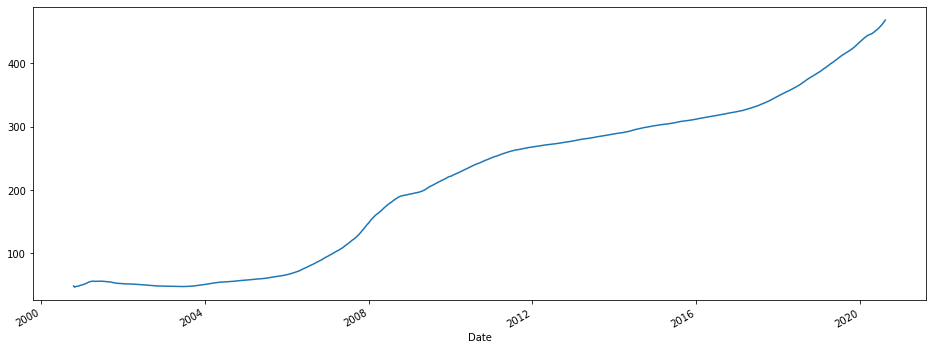

In [64]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [65]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [66]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [67]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [68]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [69]:
# Initialising the RNN
regressor = Sequential()

In [70]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [ ]:
from google.colab import files
files.upload()

In [73]:
dataset_test = pd.read_csv("RELIANCETest.csv", index_col="Date",parse_dates=True)

In [74]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [75]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-17,2105.0,2105.000000,2070.100098,2091.350098,2091.350098,14296834
2020-08-18,2085.0,2134.300049,2082.350098,2118.550049,2118.550049,14097746
2020-08-19,2141.0,2154.000000,2121.350098,2131.550049,2131.550049,15731396
2020-08-20,2120.0,2123.899902,2088.000000,2097.050049,2097.050049,10401212
2020-08-21,2118.0,2122.000000,2077.000000,2081.850098,2081.850098,11667129


In [76]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2020-08-17 to 2020-10-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       42 non-null     float64
 1   High       42 non-null     float64
 2   Low        42 non-null     float64
 3   Close      42 non-null     float64
 4   Adj Close  42 non-null     float64
 5   Volume     42 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 2.3 KB


In [87]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [78]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2020-08-17 to 2020-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


In [82]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [83]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       0 non-null      float32
dtypes: float32(1)
memory usage: 208.0 bytes


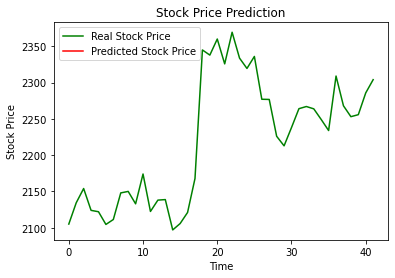

In [92]:
plt.plot(real_stock_price, color = 'green', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()